# SETUP

In [59]:
import pandas as pd
import numpy as np

In [60]:
# define the name of the csv file you want to read in
accounts = './data/accounts.csv'
playbacks = './data/playbacks.csv'
subscriptions = './data/subscriptions.csv'

# ACCOUNTS

In [5]:
# Read accounts (01.10.2020 - 01.10.2022)
df_accounts = pd.read_csv(accounts)
df_accounts.columns = df_accounts.columns.str.lower()
display(df_accounts.shape)
display(df_accounts.head())

(17079, 7)

,account_key,postal_code,city,language,country_code,onetime_rental_count,subscription_count
0,60a90104f44414d9036aed7d96d1468a5a9e1d104b6791...,5430,Wettingen,de,CH,0,1
1,a48b28809457e680de54b4b560e00117308431c574aab2...,8706,Meilen,de,CH,0,1
2,7a280859423057ac5f1e0bfc15af602edd23900f3cf7cb...,1005,Lausanne,fr,CH,1,0
3,23e7ac18b391549e95a98d85a3adae1f3f90c4fcc09732...,4436,Oberdorf,de,CH,0,2
4,a39dbaa7972fb67c15db79d4a66cf5d1b94855ae530774...,6005,Luzern,de,CH,8,2


In [ ]:
df_accounts.dtypes

account_key             object
postal_code             object
city                    object
language                object
country_code            object
onetime_rental_count     int64
subscription_count       int64
dtype: object

In [ ]:
display(df_accounts.country_code.nunique())
df_accounts.country_code.unique()

56

array(['CH', 'DE', 'GR', 'LI', 'US', 'AT', 'TH', 'FR', 'GB', 'BE', 'RU',
       'EG', 'HK', 'PT', 'IT', 'SA', 'NZ', 'MX', 'PE', 'CO', 'PL', 'CA',
       'ID', 'ES', 'HU', 'IL', 'NO', 'AU', 'CL', 'NL', 'ZA', 'JO', 'RS',
       'RO', 'IE', 'KR', 'SK', 'AE', 'GH', 'BR', 'MY', 'SE', 'CZ', 'DK',
       'IN', 'JP', 'TR', 'CI', 'EE', 'GA', 'SM', 'WF', 'FI', 'UA', 'SG',
       'IR'], dtype=object)

In [ ]:
df_accounts.country_code.value_counts()
#16.5k DACH / 17k in total

CH    15200
DE     1272
AT      190
FR      112
US       71
GB       46
LI       39
CA       17
IT       13
BE       11
SE        9
AU        8
NO        8
IN        6
NL        6
DK        5
PL        4
PT        4
CO        3
NZ        3
CZ        3
HU        3
IL        3
SK        2
AE        2
EE        2
CL        2
ES        2
RU        2
GR        2
MX        2
ID        2
EG        2
SG        1
UA        1
FI        1
WF        1
SM        1
GA        1
CI        1
TR        1
JP        1
TH        1
HK        1
MY        1
BR        1
GH        1
SA        1
KR        1
IE        1
RO        1
RS        1
JO        1
ZA        1
PE        1
IR        1
Name: country_code, dtype: int64

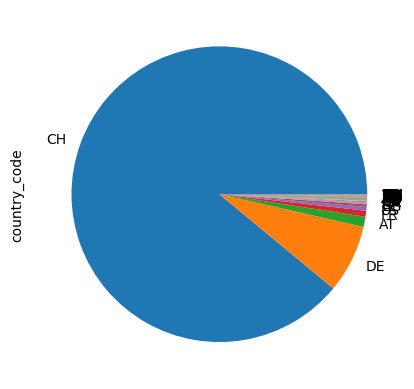

In [ ]:
df_accounts.country_code.value_counts().plot(kind='pie');

In [ ]:
display(df_accounts.language.nunique())
display(df_accounts.language.unique())
display(df_accounts.language.value_counts())

4

array(['de', 'fr', 'en', nan, 'nl'], dtype=object)

de    10942
fr     4286
en     1794
nl        1
Name: language, dtype: int64

In [ ]:
df_accounts.onetime_rental_count.unique()

array([  0,   1,   8,   2,  10,   3,  12,  23,   4,   6,  15,   5,  14,
         7,  11,  29,  16,   9,  22,  17,  39,  26,  19,  13,  27,  47,
        18,  37,  20,  24,  32,  53,  21,  28,  25,  31, 106,  52,  48,
        44,  51,  35,  30,  65,  45,  38,  61,  57,  79])

In [ ]:
display(df_accounts.subscription_count.unique())
display(df_accounts.subscription_count.value_counts())
#most have no subscription (assumption: onetime-viewer and gifted movie?)

array([ 1,  0,  2,  3,  6,  4,  5,  7, 11,  8, 12,  9, 13])

0     8103
1     6776
2     1613
3      412
4       96
5       36
7       19
6       13
8        7
11       1
12       1
9        1
13       1
Name: subscription_count, dtype: int64

In [13]:
#Check for accounts with no subscription
#display(df_accounts.subscription_count.unique())
df_accounts['subscription_count'].apply(lambda x: True if x == 0 else False).value_counts()

False    8976
True     8103
Name: subscription_count, dtype: int64